https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset

cara dapat API kaggle :

https://christianjmills.com/posts/kaggle-obtain-api-key-tutorial/

In [1]:
!pip install -q kaggle

upload kaggle.json

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srikresna","key":"c90f9c19af6b129911ae9410dd23cde4"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d crowww/a-large-scale-fish-dataset

100% 3.23G/3.24G [00:37<00:00, 136MB/s]
100% 3.24G/3.24G [00:37<00:00, 93.8MB/s]


ini bakal ke load banyak jadi silang aja output nya

In [ ]:
!unzip a-large-scale-fish-dataset.zip

In [6]:
import os

os.listdir('/content/Fish_Dataset/Fish_Dataset')

['Red Sea Bream',
 'Gilt-Head Bream',
 'Red Mullet',
 'README.txt',
 'Hourse Mackerel',
 'Shrimp',
 'Segmentation_example_script.m',
 'Striped Red Mullet',
 'Sea Bass',
 'Trout',
 'Black Sea Sprat',
 'license.txt']

In [7]:
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Black Sea Sprat/Black Sea Sprat GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Red Mullet/Red Mullet')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Red Mullet/Red Mullet GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Sea Bass/Sea Bass')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Sea Bass/Sea Bass GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Striped Red Mullet/Striped Red Mullet GT')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Trout/Trout')))
print(len(os.listdir('/content/Fish_Dataset/Fish_Dataset/Trout/Trout GT')))


1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [8]:
from pathlib import Path

dataset = Path('/content/Fish_Dataset/Fish_Dataset')

images = list(dataset.glob('**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], images))

In [9]:
import pandas as pd

image = pd.Series(images).astype(str)
labels = pd.Series(labels)

df = pd.concat([image, labels], axis=1)

df.columns = ['image', 'label']
df


,image,label
0,/content/Fish_Dataset/Fish_Dataset/Red Sea Bre...,Red Sea Bream
1,/content/Fish_Dataset/Fish_Dataset/Red Sea Bre...,Red Sea Bream
2,/content/Fish_Dataset/Fish_Dataset/Red Sea Bre...,Red Sea Bream
3,/content/Fish_Dataset/Fish_Dataset/Red Sea Bre...,Red Sea Bream
4,/content/Fish_Dataset/Fish_Dataset/Red Sea Bre...,Red Sea Bream
...,...,...
17995,/content/Fish_Dataset/Fish_Dataset/Black Sea S...,Black Sea Sprat
17996,/content/Fish_Dataset/Fish_Dataset/Black Sea S...,Black Sea Sprat
17997,/content/Fish_Dataset/Fish_Dataset/Black Sea S...,Black Sea Sprat
17998,/content/Fish_Dataset/Fish_Dataset/Black Sea S...,Black Sea Sprat


In [10]:
new_df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
new_df

,image,label
0,/content/Fish_Dataset/Fish_Dataset/Red Sea Bre...,Red Sea Bream
1,/content/Fish_Dataset/Fish_Dataset/Red Sea Bre...,Red Sea Bream
2,/content/Fish_Dataset/Fish_Dataset/Red Sea Bre...,Red Sea Bream
3,/content/Fish_Dataset/Fish_Dataset/Red Sea Bre...,Red Sea Bream
4,/content/Fish_Dataset/Fish_Dataset/Red Sea Bre...,Red Sea Bream
...,...,...
8995,/content/Fish_Dataset/Fish_Dataset/Black Sea S...,Black Sea Sprat
8996,/content/Fish_Dataset/Fish_Dataset/Black Sea S...,Black Sea Sprat
8997,/content/Fish_Dataset/Fish_Dataset/Black Sea S...,Black Sea Sprat
8998,/content/Fish_Dataset/Fish_Dataset/Black Sea S...,Black Sea Sprat


In [11]:
new_df.label.value_counts()

Red Sea Bream         1000
Gilt-Head Bream       1000
Red Mullet            1000
Hourse Mackerel       1000
Shrimp                1000
Striped Red Mullet    1000
Sea Bass              1000
Trout                 1000
Black Sea Sprat       1000
Name: label, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(new_df, test_size=0.2,random_state=123)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(rescale = 1./255,
    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train = image_data_generator.flow_from_dataframe(dataframe=x_train,
                                                 x_col='image',
                                                 y_col='label',
                                                 target_size=(64,64),
                                                 color_mode='rgb',
                                                 class_mode='categorical',
                                                 shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test,
                                                x_col='image',
                                                y_col='label',
                                                target_size=(64,64),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                shuffle=False)

Found 7200 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [14]:
import tensorflow as tf


model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation = 'softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0

In [18]:
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [19]:
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

#Callback Function
class accCallback(Callback):
   def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.92 and logs.get('val_accuracy') >= 0.92):
            print("\nAccuracy and Val_Accuracy has reached 98%!", "\nEpoch: ", epoch)
            self.model.stop_training = True

callbacks = accCallback()

auto_reduction_LR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2, #setelah 2 epoch, jika tidak ada kenaikan maka LR berkurang
    verbose = 1,
    factor = 0.2,
    min_lr = 0.000003
)

auto_stop_learn = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0,
    patience = 4,
    verbose = 1,
    mode = 'auto'
)
history = model.fit(train,
                    validation_data=test,
                    epochs=50,
                    callbacks=[callbacks, auto_reduction_LR, auto_stop_learn],
                    batch_size=64
                    )

Epoch 1/50
225/225 [==============================] - 93s 402ms/step - loss: 1.6968 - accuracy: 0.3319 - val_loss: 1.1282 - val_accuracy: 0.5411 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 91s 406ms/step - loss: 1.0791 - accuracy: 0.5624 - val_loss: 0.9461 - val_accuracy: 0.5861 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 91s 405ms/step - loss: 0.8833 - accuracy: 0.6388 - val_loss: 0.8259 - val_accuracy: 0.6589 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 91s 403ms/step - loss: 0.7568 - accuracy: 0.6915 - val_loss: 0.8177 - val_accuracy: 0.6583 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 89s 394ms/step - loss: 0.6581 - accuracy: 0.7303 - val_loss: 0.5367 - val_accuracy: 0.7889 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 88s 393ms/step - loss: 0.5982 - accuracy: 0.7644 - val_loss: 0.5105 - val_accuracy: 0.7972 - lr: 0.0010
Epoch 7/50
225/225 [==============================] 

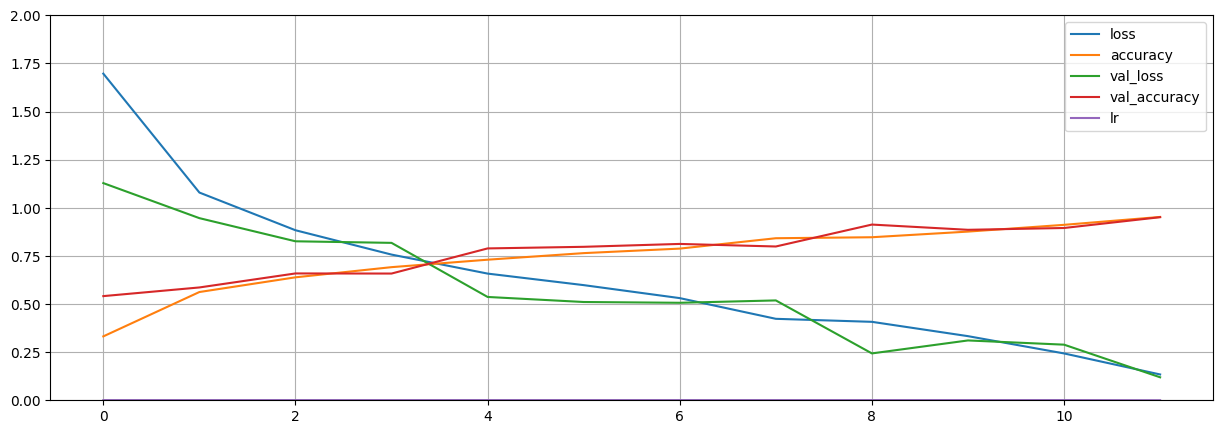

In [20]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(15, 5))
plt.grid(True)
plt.gca().set_ylim(0,2)

plt.show()

In [21]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

# Konversi
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('proyek-akhir-dicoding.tflite', 'wb') as f:
  f.write(tflite_model)

pastikan sudah ada file .tflite